### Plot FWI'S results profiles
Zhang shuo 20/5/2023

__import libraries__

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pylab import rcParams
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from matplotlib.ticker import FormatStrFormatter

__FD grid dimensions__

In [53]:
DH = 20.0;
NX = 500;
NY = 174;

__Read $V_p$, $V_s$ and density  model__

In [54]:
stage = 4;
basename_FWI = "/home/master/Python/DENISE/DENISE-Black-Edition/par/model/"
basename_original ="/home/master/Python/DENISE/DENISE-Black-Edition/DENISE-Benchmark/Marmousi-II/start/"

In [55]:
name_vp=basename_original+"marmousi_II_marine.vp"
name_vp_fwi = basename_FWI + "modelTest_vp_stage_" + "%0.*f" %(0,np.fix(stage)) + ".bin"
name_vp_start = basename_original+"marmousi_II_start_1D.vp"

f = open (name_vp)
data_type = np.dtype ('float32').newbyteorder ('<')
vp = np.fromfile (f, dtype=data_type)
vp = vp.reshape(NX,NY)
vp = np.transpose(vp)

f_fwi = open (name_vp_fwi)
vp_fwi = np.fromfile (f_fwi, dtype=data_type)
vp_fwi = vp_fwi.reshape(NX,NY)
vp_fwi = np.transpose(vp_fwi)

f_start = open (name_vp_start)
vp_start = np.fromfile (f_start, dtype=data_type)
vp_start = vp_start.reshape(NX,NY)
vp_start = np.transpose(vp_start)

In [56]:
name_vs=basename_original+"marmousi_II_marine.vs"
name_vs_fwi = basename_FWI + "modelTest_vs_stage_" + "%0.*f" %(0,np.fix(stage)) + ".bin"
name_vs_start = basename_original+"marmousi_II_start_1D.vs"

f = open (name_vs)
data_type = np.dtype ('float32').newbyteorder ('<')
vs = np.fromfile (f, dtype=data_type)
vs = vs.reshape(NX,NY)
vs = np.transpose(vs)
#vs = np.flipud(vs)

f_fwi = open (name_vs_fwi)
vs_fwi = np.fromfile (f_fwi, dtype=data_type)
vs_fwi = vs_fwi.reshape(NX,NY)
vs_fwi = np.transpose(vs_fwi)

f_start = open (name_vs_start)
vs_start = np.fromfile (f_start, dtype=data_type)
vs_start = vs_start.reshape(NX,NY)
vs_start = np.transpose(vs_start)

In [57]:
name_rho=basename_original+"marmousi_II_marine.rho"
name_rho_fwi = basename_FWI + "modelTest_rho_stage_" + "%0.*f" %(0,np.fix(stage)) + ".bin"
name_rho_start = basename_original+"marmousi_II_start_1D.rho"

f = open (name_rho)
data_type = np.dtype ('float32').newbyteorder ('<')
rho = np.fromfile (f, dtype=data_type)
rho = rho.reshape(NX,NY)
rho = np.transpose(rho)

f_fwi = open (name_rho_fwi)
rho_fwi = np.fromfile (f_fwi, dtype=data_type)
rho_fwi = rho_fwi.reshape(NX,NY)
rho_fwi = np.transpose(rho_fwi)

f_start = open (name_rho_start)
rho_start = np.fromfile (f_start, dtype=data_type)
rho_start = rho_start.reshape(NX,NY)
rho_start = np.transpose(rho_start)

__Define Axis__

In [58]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)
x = np.divide(x,1000.0);
y = np.divide(y,1000.0);

The parameter about `X_porsition` is `km`

__Define fonts__

In [59]:
FSize = 10
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 12, 11

In [76]:
def plot_profiel(n,model_Start,model_Fwi,model_Original,X_porsition):
    
    minvalue=(round(model_Original.min()/500))*500
    maxvalue=(round(model_Original.max()/500))*500
    ax=plt.subplot(1, 3, n)
    ax.set_xticks(np.linspace(minvalue,maxvalue,num=6))
    #ax.set_yticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5])
    plt.title('Depth profile at $X_{p}$=%.1f km'%X_porsition)
    
    X_porsition=int(X_porsition*1000/20)
    
    CurveData_start=model_Start[...,X_porsition]
    CurveData_fwi=model_Fwi[...,X_porsition]
    CurveData_original=model_Original[...,X_porsition]
    Depthdata=np.arange(0.0, DH*NY, DH)
    
    plt.plot(CurveData_start,Depthdata,'g-',CurveData_fwi,Depthdata,'r--',CurveData_original,Depthdata,'b-')
    plt.legend(['Initial model','FWI model','True model'],loc='upper right')
    
    
    plt.axis('tight')
    plt.ylabel('Depth [m]', fontdict=font)
    if n==1:
        plt.xlabel('P-wave velocity $[m/s]$', fontdict=font)
    if n==2:
        plt.xlabel('S-wave velocity $[m/s]$', fontdict=font)
    if n==3:
        plt.xlabel('Density $[kg/m^3]$', fontdict=font)
    plt.gca().invert_yaxis()
    plt.tight_layout()

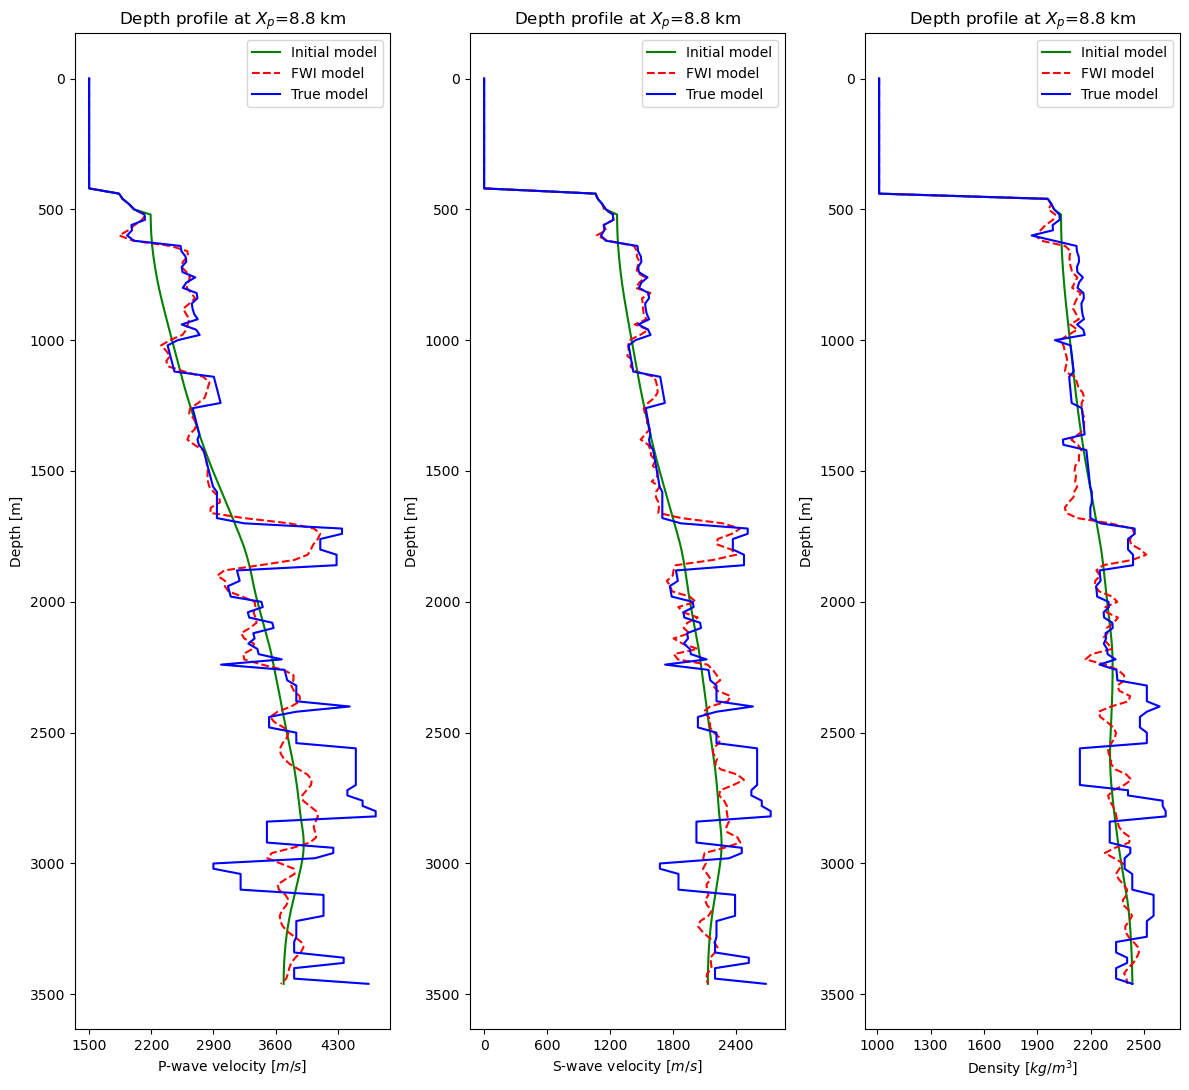

In [80]:
plt.close('all')
plt.figure()
X_porsition=8.8
plot_profiel(1, vp_start,vp_fwi,vp, X_porsition)
plot_profiel(2, vs_start,vs_fwi,vs, X_porsition)
plot_profiel(3, rho_start,rho_fwi,rho, X_porsition)
plt.savefig('Profile comparison at %.1f.svg'%X_porsition, format='svg', dpi=300)
plt.show()